# PISA Data Exploration
### by Andreja Ho



## Table of Contents
- [Introduction](#intro)
- [Preliminary Wrangling](#wrangling)
- [Univariate Exploration](#univariate)
- [Bivariate Exploration](#bivariate)
- [Multivariate Exploration](#multivariate)
- [Conclusion](#conclusion)

<a id='intro'></a>
## Introduction

This document explores a dataset containing PISA's 2012 data. PISA is a survey of students' skills and knowledge as they approach the end of compulsory education. It is not a conventional school test. Rather than examining how well students have learned the school curriculum, it looks at how well prepared they are for life beyond school. Around 510,000 students in 65 economies globally took part in the PISA 2012 assessment of reading, mathematics, and science, representing about 28 million 15-year-olds globally. 

The students took a paper-based test that lasted 2 hours. The tests were a mixture of open-ended and multiple-choice questions that were organised in groups based on a passage setting out a real-life situation. A total of about 390 minutes of test items were covered.  Students took different combinations of different tests. They and their school principals also answered questionnaires to provide information about the students' backgrounds, schools and learning experiences and about the broader school system and learning environment.
[Source: PISA 2012](https://www.oecd.org/pisa/aboutpisa/pisa-2012-results.htm)

## Project Overview 
This project focuses on only few features of this extensive survey. For example, wealth and home possessions, cultural possessions at home, educational level of the parents, mother and father present, just to name a few. 

The purpose of this project is to highlight few comprehensive discoveries through exploratory and explanatory visuals. This project include univariate, bivariate and multivariate visualizations. An important part of data visualization is a deep understanding type of different data types and ways of encoding data in order to create meaningul visualizations. 

***Important points to remember when creating visualizations:***
- Follow good design principales, ensuring that findings are conveyed accurately and clearly 
- Pay attention to cognitive load, data ink ratio and remove cart junk
- Always strive for data integrity and avoid distracting, hiding and leading to wrong conclusions
- Know level of measurements and types of data in order to choose an appropriate plot


***The Four Levels of Measurement***<br>
In order to choose an appropriate plot type or method of analysis for your data, you need to understand the types of data you have. One common method divides the data into four levels of measurement:

Qualitative or categorical types (non-numeric types)
1. **Nominal data**: pure labels without inherent order (no label is intrinsically greater or less than any other)
2. **Ordinal data**: labels with an intrinsic order or ranking (comparison operations can be made between values, but the magnitude of differences are not be well-defined)
Quantitative or numeric types
3. **Interval data**: numeric values where absolute differences are meaningful (addition and subtraction operations can be made)
4. **Ratio data**: numeric values where relative differences are meaningful (multiplication and division operations can be made)
All quantitative-type variables also come in one of two varieties: **discrete and continuous**.

Discrete quantitative variables can only take on a specific set values at some maximum level of precision.
Continuous quantitative variables can (hypothetically) take on values to any level of precision.
*(Source: Udacity DAND, Lesson 2, Lecture 3: Levels of Measurments & Types of Data)*

All details of preliminary data wrangling, feature engineering, and specific visualizations are described in the chapters that follows.


<a id='wrangling'></a>
## Preliminary Wrangling

PISA 2012 dataset is very complex and the original dataset contains 485490 rows and 636 columns. For this analysis, I’ve chosen only a few columns of interest. To understand the variables (column headers), I used PISA’s data [dictionary](link) and PISA’s [codebook](https://www.oecd.org/pisa/pisaproducts/PISA-2012-technical-report-final.pdf). Both documents were necessary to choose variables of interest and how to properly interpret them. 

First, I looked through the dictionary to learn what data was gathered and define the idea of the interest. Next, I read through the codebook to decide what features or variables are best suited for the analysis.
 
I am interested in how specific features impact students’ performance on math, reading, and science testing. The features of interests are:<br>
   - wealth<br> 
   - cultural and home possessions<br>
   - educational resources<br>
   - parents’ and siblings’ presence<br>
   - the educational level of parents<br>
   - skip classes within school day<br>
   - skip whole school day<br>
   - Truancy - Skip whole school day<br>  
   - Truancy - Skip classes within school day<br>
  
Besides those features, I will be analyzing if there is any difference between<br>
   - gender<br>
   - schools that joined OECD<br>
   - country<br><br>

In [1]:
# Import dependencies
import numpy as np
import pandas as pd

In [2]:
#Import dependencies for vizuals
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme()

In [3]:
# # Read in original dataset and explore what features are most suitable for the analysis
# # THIS LINE OF CODE ID SWITCHED OFF FOR FASTER LOADING.

# df_origin = pd.read_csv('pisa2012.csv',sep=',', encoding='latin-1',error_bad_lines=False, index_col=False, dtype='unicode')
# pd.set_option('display.max_columns', None)
# df_origin.head(3)

In [4]:
# Dataset shape
# df_origin.shape

### Import only columns of interest

When I choose the columns of interest I used Excel `textjoin()` function in order to get all columns’ names in a list, separated with a comma and quotation marks. There were some issues with reading large csv file into pandas dataframe. Thus I used the following code: issues with readind the large csv: `pd.read_csv('pisa2012.csv',sep=',', encoding='latin-1',error_bad_lines=False, index_col=False, dtype='unicode')`


In [5]:
# List the columns of interest and read in csv file
col_list = ['CNT','OECD','SCHOOLID','ST04Q01','ST09Q01','ST115Q01','ST11Q01','ST11Q02','ST11Q03','ST11Q04','ANXMAT','CULTPOS','FISCED','HEDRES','HOMEPOS','MISCED','WEALTH','ANCBELONG','PV1MATH','PV1READ','PV1SCIE']
df_short = pd.read_csv('pisa2012.csv',sep=',', encoding='latin-1',error_bad_lines=False, index_col=False, dtype='unicode', usecols=col_list)

In [6]:
# Display all columns for better view and display first five columns
pd.set_option('display.max_columns', None)
df_short.head(5)

,CNT,OECD,SCHOOLID,ST04Q01,ST09Q01,ST115Q01,ST11Q01,ST11Q02,ST11Q03,ST11Q04,ANXMAT,CULTPOS,FISCED,HEDRES,HOMEPOS,MISCED,WEALTH,ANCBELONG,PV1MATH,PV1READ,PV1SCIE
0,Albania,Non-OECD,0000001,Female,None,1,Yes,Yes,Yes,Yes,0.32,-0.48,"ISCED 3A, ISCED 4",-1.29,-2.61,"ISCED 3A, ISCED 4",-2.92,-0.7351,406.8469,249.5762,341.7009
1,Albania,Non-OECD,0000001,Female,None,1,Yes,Yes,NaN,Yes,NaN,1.27,"ISCED 3A, ISCED 4",1.12,1.41,"ISCED 5A, 6",0.69,NaN,486.1427,406.2936,548.9929
2,Albania,Non-OECD,0000001,Female,None,1,Yes,Yes,No,Yes,NaN,1.27,"ISCED 5A, 6",-0.69,0.14,"ISCED 5A, 6",-0.23,NaN,533.2684,401.21,499.6643
3,Albania,Non-OECD,0000001,Female,None,1,Yes,Yes,No,Yes,0.31,1.27,"ISCED 5A, 6",0.04,-0.73,"ISCED 3B, C",-1.17,NaN,412.2215,547.363,438.6796
4,Albania,Non-OECD,0000001,Female,None,2,Yes,Yes,Yes,NaN,1.02,1.27,"ISCED 3A, ISCED 4",-0.69,-0.57,None,-1.17,0.8675,381.9209,311.7707,361.5628


<a id='clean'></a>
### Assess, Clean & Test

In [7]:
# Create a copy of original data sets
df = df_short.copy()

In [8]:
# Check the shape
df.shape

(485490, 21)

In [9]:
# Rename colum names for better understanding
# Columns were renamed with help of excel with `textjoin` and `concatenate` function
df.rename(columns={'CNT':'Country_code', 'OECD':'OECD_country', 'SCHOOLID':'School_ID', 'ST04Q01':'Gender', 'ST09Q01':'Truancy_Skip_whole_school_day', 'ST115Q01':'Truancy_Skip_classes_within_school_day', 'ST11Q01':'At_Home_Mother', 'ST11Q02':'At_Home_Father', 'ST11Q03':'At_Home_Brothers', 'ST11Q04':'At_Home_Sisters', 'ANXMAT':'Mathematics_Anxiety', 'CULTPOS':'Cultural_Possessions', 'FISCED':'Educational_level_of_father_ISCED', 'HEDRES':'Home_educational_resources', 'HOMEPOS':'Home_Possessions', 'MISCED':'Educational_level_of_mother_ISCED', 'WEALTH':'Wealth', 'ANCBELONG':'Sense_of_Belonging_to_School_Anchored', 'PV1MATH':'Plausible_value_mathematics', 'PV1READ':'Plausible_value_reading', 'PV1SCIE':'Plausible_value_science'}, inplace=True)

In [10]:
# Check renamed columns
df.head(3)

,Country_code,OECD_country,School_ID,Gender,Truancy_Skip_whole_school_day,Truancy_Skip_classes_within_school_day,At_Home_Mother,At_Home_Father,At_Home_Brothers,At_Home_Sisters,Mathematics_Anxiety,Cultural_Possessions,Educational_level_of_father_ISCED,Home_educational_resources,Home_Possessions,Educational_level_of_mother_ISCED,Wealth,Sense_of_Belonging_to_School_Anchored,Plausible_value_mathematics,Plausible_value_reading,Plausible_value_science
0,Albania,Non-OECD,0000001,Female,None,1,Yes,Yes,Yes,Yes,0.32,-0.48,"ISCED 3A, ISCED 4",-1.29,-2.61,"ISCED 3A, ISCED 4",-2.92,-0.7351,406.8469,249.5762,341.7009
1,Albania,Non-OECD,0000001,Female,None,1,Yes,Yes,NaN,Yes,NaN,1.27,"ISCED 3A, ISCED 4",1.12,1.41,"ISCED 5A, 6",0.69,NaN,486.1427,406.2936,548.9929
2,Albania,Non-OECD,0000001,Female,None,1,Yes,Yes,No,Yes,NaN,1.27,"ISCED 5A, 6",-0.69,0.14,"ISCED 5A, 6",-0.23,NaN,533.2684,401.21,499.6643


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 21 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   Country_code                            485490 non-null  object
 1   OECD_country                            485490 non-null  object
 2   School_ID                               485490 non-null  object
 3   Gender                                  485490 non-null  object
 4   Truancy_Skip_whole_school_day           479131 non-null  object
 5   Truancy_Skip_classes_within_school_day  479269 non-null  object
 6   At_Home_Mother                          460559 non-null  object
 7   At_Home_Father                          441036 non-null  object
 8   At_Home_Brothers                        400076 non-null  object
 9   At_Home_Sisters                         390768 non-null  object
 10  Mathematics_Anxiety                     314764 non-null 

Based on this [wikipedia](https://en.wikipedia.org/wiki/International_Standard_Classification_of_Education) site I have changed educational level of for better understanding:

| Pisa 2012 | From Wikipedia - ISCED 2011 | encoding used in this dataset
| :- | :- | :- |
|ISCED 1           | Primary education | ISCED 1
|ISCED 2           | Lower secondary education|  ISCED 2
|ISCED 3B, C       | Upper secondary education  | ISCED 3
|ISCED 3A, ISCED 4 | Post-secondary non-tertiary education   | ISCED 4
|ISCED 5B          | Short-cycle tertiary education | ISCED 5
|ISCED 5A, 6       | Bachelor's or equivalent  | ISCED 6
|None| None| None

In [12]:
# Rename education level - father
df.Educational_level_of_father_ISCED.value_counts()

ISCED 3A, ISCED 4    118890
ISCED 5A, 6          113406
ISCED 2               66728
ISCED 5B              61617
ISCED 3B, C           39789
ISCED 1               35938
None                  16535
Name: Educational_level_of_father_ISCED, dtype: int64

In [13]:
# Rename education level - mother
df.Educational_level_of_mother_ISCED.value_counts()

ISCED 3A, ISCED 4    126768
ISCED 5A, 6          114452
ISCED 5B              68219
ISCED 2               66650
ISCED 1               36556
ISCED 3B, C           35672
None                  18768
Name: Educational_level_of_mother_ISCED, dtype: int64

In [14]:
# Rename Truancy_Skip_whole_school_day
df.Truancy_Skip_whole_school_day.value_counts()

None                     385998
One or two times          75969
Three or four times       10882
Five or more times         6282
Name: Truancy_Skip_whole_school_day, dtype: int64

In [15]:
# Replace educational values with with easy understand values (see comments for explanation)
df["Educational_level_of_father_ISCED"] \
.replace({"None" : "ISCED 0",
          "ISCED 1": "ISCED 1",
          "ISCED 2": "ISCED 2",
          "ISCED 3B, C" : "ISCED 3",
          "ISCED 3A, ISCED 4": "ISCED 4",
          "ISCED 5B": "ISCED 5",
          "ISCED 5A, 6" :"ISCED 6"}, inplace=True)

In [16]:
# Replace educational values with easy understand values (see comments for explanation)
df["Educational_level_of_mother_ISCED"] \
.replace({"None" : "ISCED 0",
          "ISCED 1": "ISCED 1",
          "ISCED 2": "ISCED 2",
          "ISCED 3B, C" : "ISCED 3",
          "ISCED 3A, ISCED 4": "ISCED 4",
          "ISCED 5B": "ISCED 5",
          "ISCED 5A, 6" :"ISCED 6"}, inplace=True)

In [17]:
# Replace Truancy_Skip_whole_school_day values with with easy understand values
df["Truancy_Skip_whole_school_day"] \
.replace({"Five or more times": "5+ times",
          "Three or four times": "3-4 times",
          "One or two times" : "1-2 times",
          "None": "0 times"}, inplace=True, regex=True)

*Issue with concerting "Truancy_Skip_whole_school_day" column to categorical datatype. Same code was used but unable to convert. Note: Pay attention when making visualizations in case of errors. Update: Issue found on [Stackoverflow](https://stackoverflow.com/questions/37593550/replace-method-not-working-on-pandas-dataframe) - regex=True was nedded!*

In [18]:
# Check for correct transformation - function didn't work!
df.Truancy_Skip_whole_school_day.value_counts()

0 times        385998
1-2 times       75969
3-4 times       10882
5+ times         6282
Name: Truancy_Skip_whole_school_day, dtype: int64

In [19]:
#pd.set_option('display.max_rows', None) - THIS LINE OF CODE WAS SWITCHED OFF FOR SHORTER DISPLAY
# Assess the county columns to perform necessary cleaning
df.Country_code.value_counts().sort_index(ascending=False)

Vietnam                      4959
Uruguay                      5315
United States of America     4978
United Kingdom              12659
United Arab Emirates        11500
                            ...  
Belgium                      8597
Austria                      4755
Australia                   14481
Argentina                    5908
Albania                      4743
Name: Country_code, Length: 68, dtype: int64

In [20]:
# Combine names that have been broken down by states or cities with one unique name of the country
df = df.replace(['Connecticut (USA)', 'Florida (USA)', 'Massachusetts (USA)', 'United States of America'], 'USA')
df = df.replace(['Chinese Taipei'], 'Taiwan')
df = df.replace(['China-Shanghai', 'Hong Kong-China', 'Macao-China'], 'China')
df = df.replace(['Russian Federation', 'Perm(Russian Federation)'], 'Russia')

In [21]:
# Check for the right transformation
#df.Country_code.value_counts().sort_index(ascending=False)

<a id='datatypes'></a>
### Levels of Measurement and Datatypes
It is important to change datatypes into appropriate datatypes for several reasons
- faster performance
- lower usage of the memory
- efficient computation and usage of Python's and pandas' functions

In [22]:
# Check datatype and other properties
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 21 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   Country_code                            485490 non-null  object
 1   OECD_country                            485490 non-null  object
 2   School_ID                               485490 non-null  object
 3   Gender                                  485490 non-null  object
 4   Truancy_Skip_whole_school_day           479131 non-null  object
 5   Truancy_Skip_classes_within_school_day  479269 non-null  object
 6   At_Home_Mother                          460559 non-null  object
 7   At_Home_Father                          441036 non-null  object
 8   At_Home_Brothers                        400076 non-null  object
 9   At_Home_Sisters                         390768 non-null  object
 10  Mathematics_Anxiety                     314764 non-null 

In [23]:
# Check for null values
df.isnull().sum()

Country_code                                   0
OECD_country                                   0
School_ID                                      0
Gender                                         0
Truancy_Skip_whole_school_day               6359
Truancy_Skip_classes_within_school_day      6221
At_Home_Mother                             24931
At_Home_Father                             44454
At_Home_Brothers                           85414
At_Home_Sisters                            94722
Mathematics_Anxiety                       170726
Cultural_Possessions                       14133
Educational_level_of_father_ISCED          32587
Home_educational_resources                  7718
Home_Possessions                            5683
Educational_level_of_mother_ISCED          18405
Wealth                                      5893
Sense_of_Belonging_to_School_Anchored     177850
Plausible_value_mathematics                    0
Plausible_value_reading                        0
Plausible_value_scie

*Sense_of_Belonging_to_School_Anchored (177850) and  Mathematics_Anxiety (170726) has too many null values. For the this analysis purposes I have to drop null values (one of the reasons is to change datatype). For this reason I won't include these two features into my analysis.*

In [24]:
# Drop columns Sense_of_Belonging_to_School_Anchored and Mathematics_Anxiety
df.drop(['Sense_of_Belonging_to_School_Anchored', 'Mathematics_Anxiety'], axis=1, inplace=True)

In [25]:
# Drop null values
df.dropna(inplace=True)

In [26]:
# Check data shape
df.shape

(325497, 19)

In [27]:
# Change Educational_level_of_father_ISCED to categort datatype
educational_classes = ['ISCED 0', 'ISCED 1', 'ISCED 2', 'ISCED 3', 'ISCED 4', 'ISCED 5', 'ISCED 6']
vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = educational_classes)
df['Educational_level_of_father_ISCED'] = df['Educational_level_of_father_ISCED'].astype(vclasses)

In [28]:
# Change Educational_level_of_father_ISCED to categort datatype
educational_classes = ['ISCED 0','ISCED 1', 'ISCED 2', 'ISCED 3', 'ISCED 4', 'ISCED 5', 'ISCED 6']
vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = educational_classes)
df['Educational_level_of_mother_ISCED'] = df['Educational_level_of_mother_ISCED'].astype(vclasses)

In [29]:
df.Truancy_Skip_whole_school_day.value_counts()

0 times        265667
1-2 times       49357
3-4 times        6774
5+ times         3699
Name: Truancy_Skip_whole_school_day, dtype: int64

In [30]:
# # Change Truancy_Skip_whole_school_day to categort datatype
# skip_school_day = ['0 times', '1-2 times', '3-4 times', '5+ times']
# categorical_variable = pd.api.types.CategoricalDtype(ordered = True, categories = skip_school_day)
# df['Truancy_Skip_whole_school_day'] = df['Truancy_Skip_whole_school_day'].astype(categorical_variable)

In [31]:
#df.Truancy_Skip_whole_school_day.value_counts()

*Issue with concerting "Truancy_Skip_whole_school_day" column to categorical datatype. Same code was used but unable to convert. Note: Pay attention when making visualizations in case of errors.*

In [32]:
# Change OECD_country to boolean - leave as is!
# oecd_country = {'OECD': True, 'Non-OECD': False}
# df["OECD_country"].replace(oecd_country, inplace=True)

In [33]:
# Chenge mother, father, brothers, sisters at home to boolean
home = {'Yes': True, 'No': False}
df["At_Home_Mother"].replace(home, inplace=True)
df["At_Home_Father"].replace(home, inplace=True)
df["At_Home_Brothers"].replace(home, inplace=True)
df["At_Home_Sisters"].replace(home, inplace=True)

In [34]:
# using dictionary to convert specific columns
convert_dict = {'Truancy_Skip_classes_within_school_day': int,
                'Cultural_Possessions' : float,
                'Home_educational_resources': float,
                'Home_Possessions': float,
                'Wealth': float,
                'Plausible_value_mathematics' : float,
                'Plausible_value_reading': float,
                'Plausible_value_science' : float,      
               }
df = df.astype(convert_dict)

In [83]:
# Check for datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325497 entries, 0 to 485489
Data columns (total 20 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   Country_code                            325497 non-null  object  
 1   OECD_country                            325497 non-null  object  
 2   School_ID                               325497 non-null  object  
 3   Gender                                  325497 non-null  object  
 4   Truancy_Skip_whole_school_day           325497 non-null  object  
 5   Truancy_Skip_classes_within_school_day  325497 non-null  int32   
 6   Cultural_Possessions                    325497 non-null  float64 
 7   Educational_level_of_father_ISCED       325497 non-null  category
 8   Home_educational_resources              325497 non-null  float64 
 9   Home_Possessions                        325497 non-null  float64 
 10  Educational_level_of_mother_ISCE

### Feature engineering

In [36]:
# Create overall score
df['Overall_score'] = ((df.Plausible_value_mathematics + df.Plausible_value_reading + df.Plausible_value_science) / 3)

In [37]:
# Create single parent column
df['Single_parent'] = np.where((df['At_Home_Mother'] == True) & (df['At_Home_Father'] == True), False, True)

In [38]:
# Create single child column
df['Single_child'] = np.where((df['At_Home_Brothers'] == False) & (df['At_Home_Sisters'] == False), True, False)

In [39]:
# Create parent higest education column
df['Parent_highest_education'] = df[["Educational_level_of_father_ISCED", "Educational_level_of_mother_ISCED"]].max(axis=1)

In [82]:
# Change Parent highest education to categorical datatype
educational_classes = ['ISCED 0','ISCED 1', 'ISCED 2', 'ISCED 3', 'ISCED 4', 'ISCED 5', 'ISCED 6']
vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = educational_classes)
df['Parent_highest_education'] = df['Parent_highest_education'].astype(vclasses)

In [41]:
# Check dataframe for accuraccy
df.sample(3)

,Country_code,OECD_country,School_ID,Gender,Truancy_Skip_whole_school_day,Truancy_Skip_classes_within_school_day,At_Home_Mother,At_Home_Father,At_Home_Brothers,At_Home_Sisters,Cultural_Possessions,Educational_level_of_father_ISCED,Home_educational_resources,Home_Possessions,Educational_level_of_mother_ISCED,Wealth,Plausible_value_mathematics,Plausible_value_reading,Plausible_value_science,Overall_score,Single_parent,Single_child,Parent_highest_education
389284,Qatar,Non-OECD,0000002,Male,0 times,2,True,True,True,False,0.25,ISCED 4,0.04,-0.95,ISCED 0,-1.08,413.0005,344.8181,423.1070,393.641867,False,False,ISCED 4
332976,Mexico,OECD,0000744,Male,0 times,1,True,True,True,True,-0.48,ISCED 4,-0.69,-1.85,ISCED 2,-2.04,386.2050,350.4317,397.9299,378.188867,False,False,ISCED 4
352483,Montenegro,Non-OECD,0000031,Male,0 times,1,True,True,True,True,1.27,ISCED 2,-1.80,-1.32,ISCED 2,-1.32,369.6136,416.4318,360.6304,382.225267,False,False,ISCED 2


In [42]:
# drop unceccessary columns
df.drop(['At_Home_Mother', 'At_Home_Father', 'At_Home_Brothers', 'At_Home_Sisters'], axis=1, inplace=True)

In [43]:
# Check data shape
df.shape

(325497, 19)

<a id='store'></a>
### Storing Data

In [44]:
# Export final dataframe
df.to_csv("Data/clean_PISA_df.csv", index=False)

<a id='features'></a>
### QUESTIONS
### What is the structure of your dataset?

After preliminary data-wrangling cleaned PISA data set contains 325497 rows and 19 columns.
- 325497 rows represent students that took place in PISA 2012. 
- 19 columns or feature of interests are:


| feature | converted datatype | 
| :- | :- |                   
OECD_country     |     bool                 
School_ID |       object                       
Gender  |       object                         
Truancy_Skip_whole_school_day    |      object
Truancy_Skip_classes_within_school_day  | int
Single_parent     |                  bool
Single_child    |                     bool
Cultural_Possessions   |                float
Educational_level_of_father_ISCED    | category  
Home_educational_resources  |            float
Home_Possessions     |                   float
Educational_level_of_mother_ISCED       | category
Wealth   |                               float
Plausible_value_mathematics    | float        
Plausible_value_reading    |             float
Plausible_value_science  | float
Overall_score | float

When reading the csv file to pandas data frame all features came as object datatypes. For more efficient computations and memory usage, I changed object datatypes to more appropriate datatypes as shown in the table above.

Cultural Possessions, Home educational resources, Home Possessions and Wealth are numeric types of variables. The values represent index values ranging from small negative number to small positive number. The smaller the number the lower value of the indices. Home possessions variable represent the sum of all three variables (whealth, cultural possessions and home educational possessions). Figure below shows the wording of items and their allocation of the four indices.


### What is/are the main feature(s) of interest in your dataset?

After initial data wrangling and initial data assessing, I decided what is my main point of interest. I am interested in how specific features impact students’ performance on math, reading, and science testing. For example, do features such as wealth, cultural possession, home educational resources, and home possessions have a positive or negative impact on students’ scores in math, reading, and science. Additionally, I am interested in the correlation between students’ scores and the educational level of the parents. Moreover, I will explore if the absence of mother, father, and siblings affects students’ scores. Taking all mentioned features into account I am interested if there is a difference between genders, countries, and countries that joined OECD.

OECD = Organisation for Economic Co-operation and Development



### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that students who belong to OECD countries and whose wealth and other home possessions are higher will perform better on testing. Additionally, I expect that students whose parents have higher education will also perform better on the testing. I assume that there is no difference between genders.  

<a id='univariate'></a>
## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

I will start my data exploration with univariate exploration or visualizations of single variables. By looking at one variable at a time we can build an intuition for how each variable is distributed before moving on to more complicated interactions between variables. The main point for univariate exploration is to explore the variables that will be the key to answering research questions. In case that I will observe any oddities in the data such as outliers, or missing values, additional cleaning and further inspection will be needed. 

I will focus on the following charts:
- Bar charts for qualitative variables
- Histograms for quantitative variables
- Pie charts to depict relative frequencies for levels of a categorical variable


### OECD country distribution

In [45]:
# Define colors
colors = ['#90b1c8','#873e23']

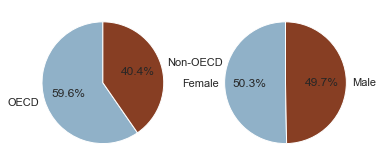

In [116]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.pie(df['OECD_country'].value_counts(), colors = colors, labels=['OECD', 'Non-OECD'], autopct='%1.1f%%', startangle=90);
ax2.pie(df['Gender'].value_counts(), colors = colors, labels=['Female', 'Male'], autopct='%1.1f%%', startangle=90);
#ax3.pie(df['Single_parent'].value_counts(), colors = colors, labels=['Both Parents', 'Single Parent'], autopct='%1.1f%%', startangle=90);

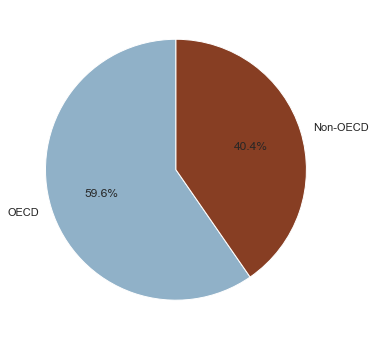

In [47]:
# Distribution of OECD countries
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(df['OECD_country'].value_counts(), colors = colors, labels=['OECD', 'Non-OECD'], autopct='%1.1f%%', startangle=90);

## Gender distribution

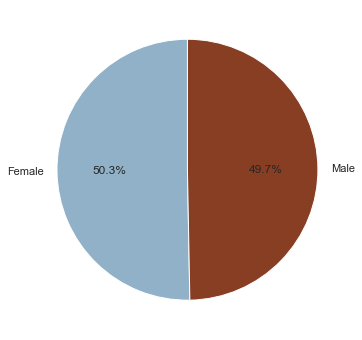

In [48]:
# Distribution of gender
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(df['Gender'].value_counts(), colors = colors, labels=['Female', 'Male'], autopct='%1.1f%%', startangle=90);

## Single Parents

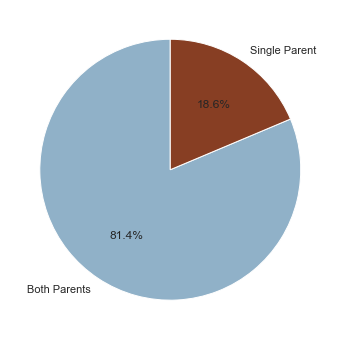

In [49]:
## Single Parents distribution
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(df['Single_parent'].value_counts(), colors = colors, labels=['Both Parents', 'Single Parent'], autopct='%1.1f%%', startangle=90);

## Math, Reading and Science scores distribution

In [50]:
# descriptive statistics for math, reading and science scores 
df.Plausible_value_mathematics.describe(), df.Plausible_value_reading.describe(), df.Plausible_value_science.describe()           

(count    325497.000000
 mean        480.433085
 std         102.667809
 min          71.124800
 25%         406.535300
 50%         477.652300
 75%         551.885000
 max         962.229300
 Name: Plausible_value_mathematics, dtype: float64,
 count    325497.000000
 mean        481.557202
 std         100.285503
 min           0.083400
 25%         413.918900
 50%         484.692000
 75%         552.762500
 max         904.802600
 Name: Plausible_value_reading, dtype: float64,
 count    325497.00000
 mean        485.68416
 std         100.14623
 min           6.84450
 25%         414.80790
 50%         485.67700
 75%         557.29210
 max         903.33830
 Name: Plausible_value_science, dtype: float64)

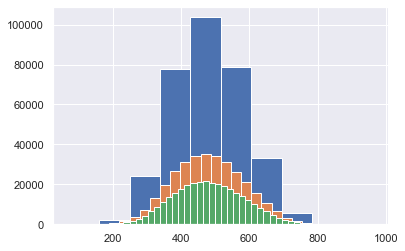

In [51]:
# Histogram for distribution of math, reading and science scores -  deciding on appropriate binning
plt.hist(data = df, x = 'Plausible_value_mathematics', bins = 10);
plt.hist(data = df, x = 'Plausible_value_mathematics', bins = 30);
plt.hist(data = df, x = 'Plausible_value_mathematics', bins = 50);

*After exploring what bin size is the most appropriate I chose binsize = 30.*

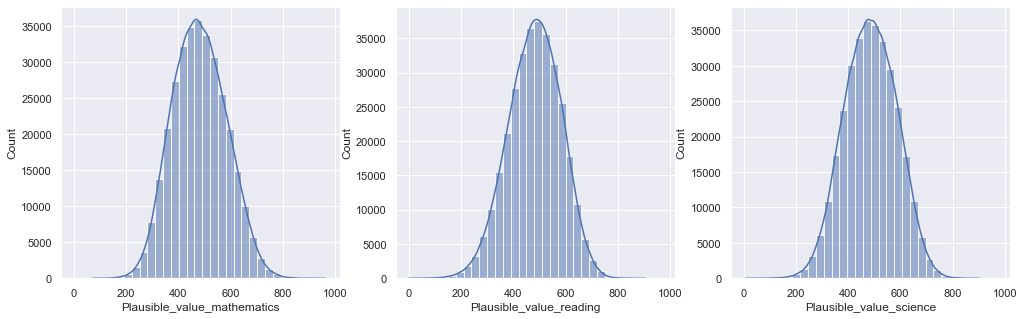

In [52]:
fig, axs = plt.subplots(ncols=3, figsize=(17, 5), sharex=True) 
sns.histplot(df.Plausible_value_mathematics, kde=True, binwidth=30, ax=axs[0]);
sns.histplot(df.Plausible_value_reading, kde=True, binwidth=30, ax=axs[1]);
sns.histplot(df.Plausible_value_science, kde=True, binwidth=30, ax=axs[2]);

*Math, Reading and Science scores are normaly distributed.*

### Educational status of the parents

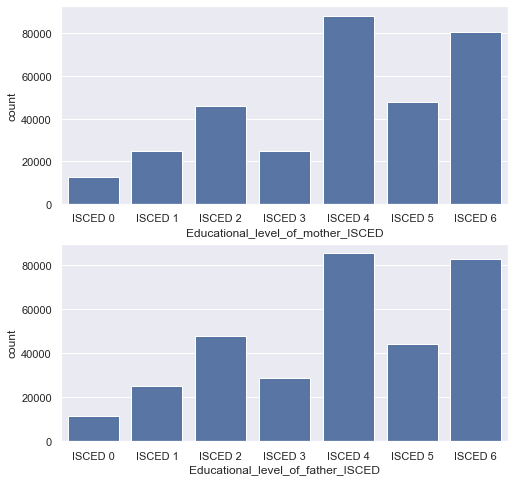

In [53]:
# let's plot all three together to get an idea of each ordinal variable's distribution.
fig, ax = plt.subplots(nrows=2, figsize = [8,8])

default_color = sns.color_palette()[0]
sns.countplot(data = df, x = 'Educational_level_of_mother_ISCED', color = default_color, ax = ax[0])
sns.countplot(data = df, x = 'Educational_level_of_father_ISCED', color = default_color, ax = ax[1])

plt.show()

From the chart above we can see that both parents have similar education level. Most parents have level 4 or level 6 educational levet, while small portion have no education level completed.

### Wealth and home possesions

Explanation of the variables - from the codebook!! Cultural_Possessions
Home_educational_resources
Home_Possessions
Wealth

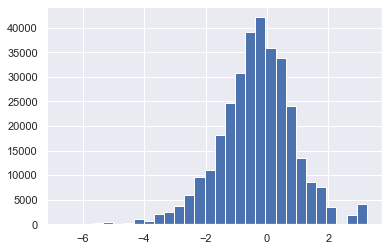

In [54]:
# Histogram for distribution of Wealth
plt.hist(data = df, x = 'Wealth', bins = 30);

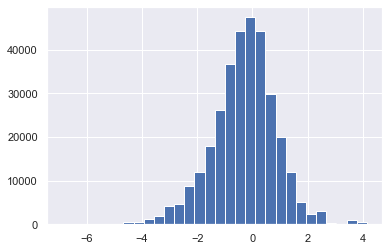

In [55]:
# Histogram for Home_Possessions = summary index
plt.hist(data = df, x = 'Home_Possessions', bins = 30);

*Some of the values seems a bit extreme - see the tails -  investigate further with boxplots!!!*

### Cultular possesions

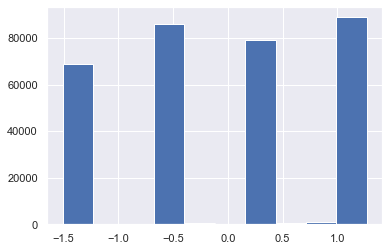

In [56]:
# Histogram for Cultural_Possessions: lesson 3 lecture 11 - choosing plot for discrete 
plt.hist(data = df, x = 'Cultural_Possessions', bins = 10);

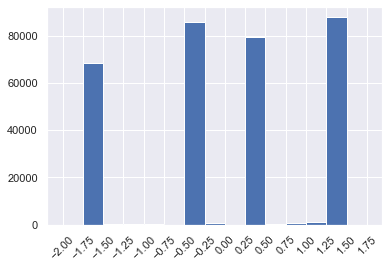

In [57]:
# Create bins with step-size 5
bins = np.arange(-2.0, df['Cultural_Possessions'].max()+0.5, 0.25)
plt.hist(data = df, x = 'Cultural_Possessions', bins = bins);
plt.xticks(np.arange(-2, 2, 0.25), rotation = 45);

In [58]:
df.Cultural_Possessions.value_counts()

 1.27    87864
-0.48    86074
 0.25    78963
-1.51    68521
 0.48      668
 1.01      579
 1.11      437
 0.97      393
-0.15      356
 0.78      332
 0.72      272
-1.17      272
-0.18      205
-0.03      190
-1.31      177
-1.33       89
-0.83       43
-1.08       40
-0.78       22
Name: Cultural_Possessions, dtype: int64

In [59]:
df.Cultural_Possessions.describe()

count    325497.000000
mean         -0.037138
std           0.999548
min          -1.510000
25%          -0.480000
50%           0.250000
75%           1.270000
max           1.270000
Name: Cultural_Possessions, dtype: float64

***Use cut function here and explain why and how!!***

In [60]:
bin_names = ['Low', 'Medium', 'High']
bin_edges = [-1.51, -0.48, 0.25, 1.27]
df['Cultural_Possessions_bin'] = pd.cut(df['Cultural_Possessions'], bin_edges, labels=bin_names)

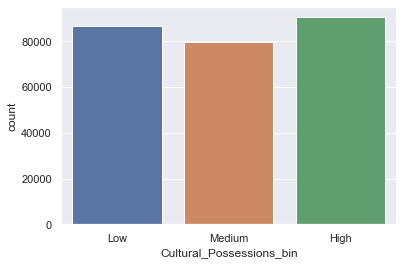

In [61]:
sns.countplot(data=df, x='Cultural_Possessions_bin');

### Home educational resources

(array([1.0680e+03, 2.5000e+01, 7.0000e+00, 3.0000e+00, 3.5940e+03,
        3.4000e+01, 9.5690e+03, 2.7900e+02, 2.0342e+04, 4.2100e+02,
        3.9364e+04, 1.1300e+02, 6.4377e+04, 1.6610e+03, 6.9500e+02,
        8.5356e+04, 0.0000e+00, 2.2300e+02, 1.3160e+03, 9.7050e+04]),
 array([-3.93  , -3.6775, -3.425 , -3.1725, -2.92  , -2.6675, -2.415 ,
        -2.1625, -1.91  , -1.6575, -1.405 , -1.1525, -0.9   , -0.6475,
        -0.395 , -0.1425,  0.11  ,  0.3625,  0.615 ,  0.8675,  1.12  ]),
 <BarContainer object of 20 artists>)

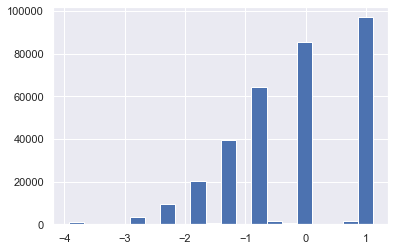

In [62]:
# Histogram for Home_educational_resources 
plt.hist(data = df, x = 'Home_educational_resources', bins = 20)

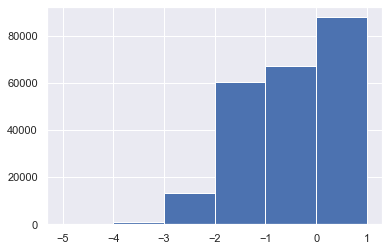

In [63]:
bins = np.arange(-5, df['Home_educational_resources'].max()+0.05, 1)
plt.hist(data = df, x = 'Home_educational_resources', bins = bins);
plt.xticks(np.arange(-5, 2, 1));

In [124]:
# Check distribution for home educational resources
df.Home_educational_resources.describe()

count    325497.000000
mean         -0.179150
std           1.073313
min          -3.930000
25%          -0.690000
50%           0.040000
75%           1.120000
max           1.120000
Name: Home_educational_resources, dtype: float64

In [125]:
bin_names_h = ['Low', 'Medium', 'High']
bin_edges_h = [-3.93, -0.69, 0.04, 1.12]
df['Home_educational_resources_bin'] = pd.cut(df['Home_educational_resources'], bin_edges_h, labels=bin_names_h)

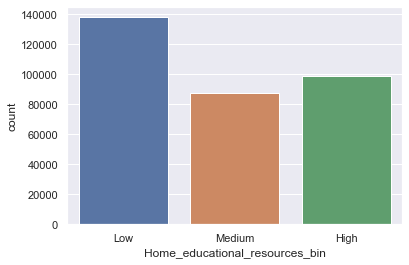

In [126]:
sns.countplot(data=df, x='Home_educational_resources_bin');

### Skip whole school day or individual classes within school days

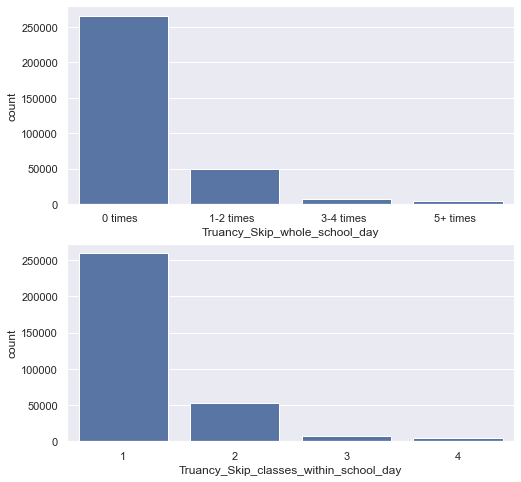

In [64]:
# let's plot all three together to get an idea of each ordinal variable's distribution.
fig, ax = plt.subplots(nrows=2, figsize = [8,8])
default_color = sns.color_palette()[0]
sns.countplot(data = df, x = 'Truancy_Skip_whole_school_day', color = default_color, ax = ax[0])
sns.countplot(data = df, x = 'Truancy_Skip_classes_within_school_day', color = default_color, ax = ax[1])
plt.show()

In [65]:
df_short.ST115Q01.value_counts()

1    378576
2     81343
3     12216
4      7134
Name: ST115Q01, dtype: int64

Here write about investigation of dropping null values!! investigate before dropping null values
check with original data = OK

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Most of the variables were pretty straight forward and didn’t require much modification besides data type transformation and renaming names for better understanding. I also perform feature engineering for the following variables: overall score (average of math, reading and science score), paren highest education (highest education level of a parent), single parent and single child.   

The next four indices required some work in order to successfully perform data analysis: Cultural Possessions, Home educational resources, Home Possessions and Wealth. Since home possessions summarize all three values (wealth, cultural possessions and home possessions) and the values are continuous representing vast values form -0.39 to 2.16 and seemed normary distributed I left it as is. Similarly I did with wealth feature. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Cultural possessions and home educational possessions appeared to be more discrete in nature and values are clustered around certain numbers I decided to group them in 3 and 4 categories respectively, based on descriptive statistics. In this case I could use them in different visuals where chart require one qualtitative and one quantitative variable. 

<a id='bivariate'></a>
## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### scatter plot - between two quantitative variables
- between math, science and reading scores
- between wealth and home possesion
- reading and cultuar possesion

In [66]:
numeric_vars = ['Plausible_value_mathematics', 'Plausible_value_reading', 'Plausible_value_science', 'Home_educational_resources', 'Home_Possessions', 'Wealth', 'Cultural_Possessions']
categoric_vars = ['Educational_level_of_father_ISCED', 'Educational_level_of_mother_ISCED', 'OECD_country']

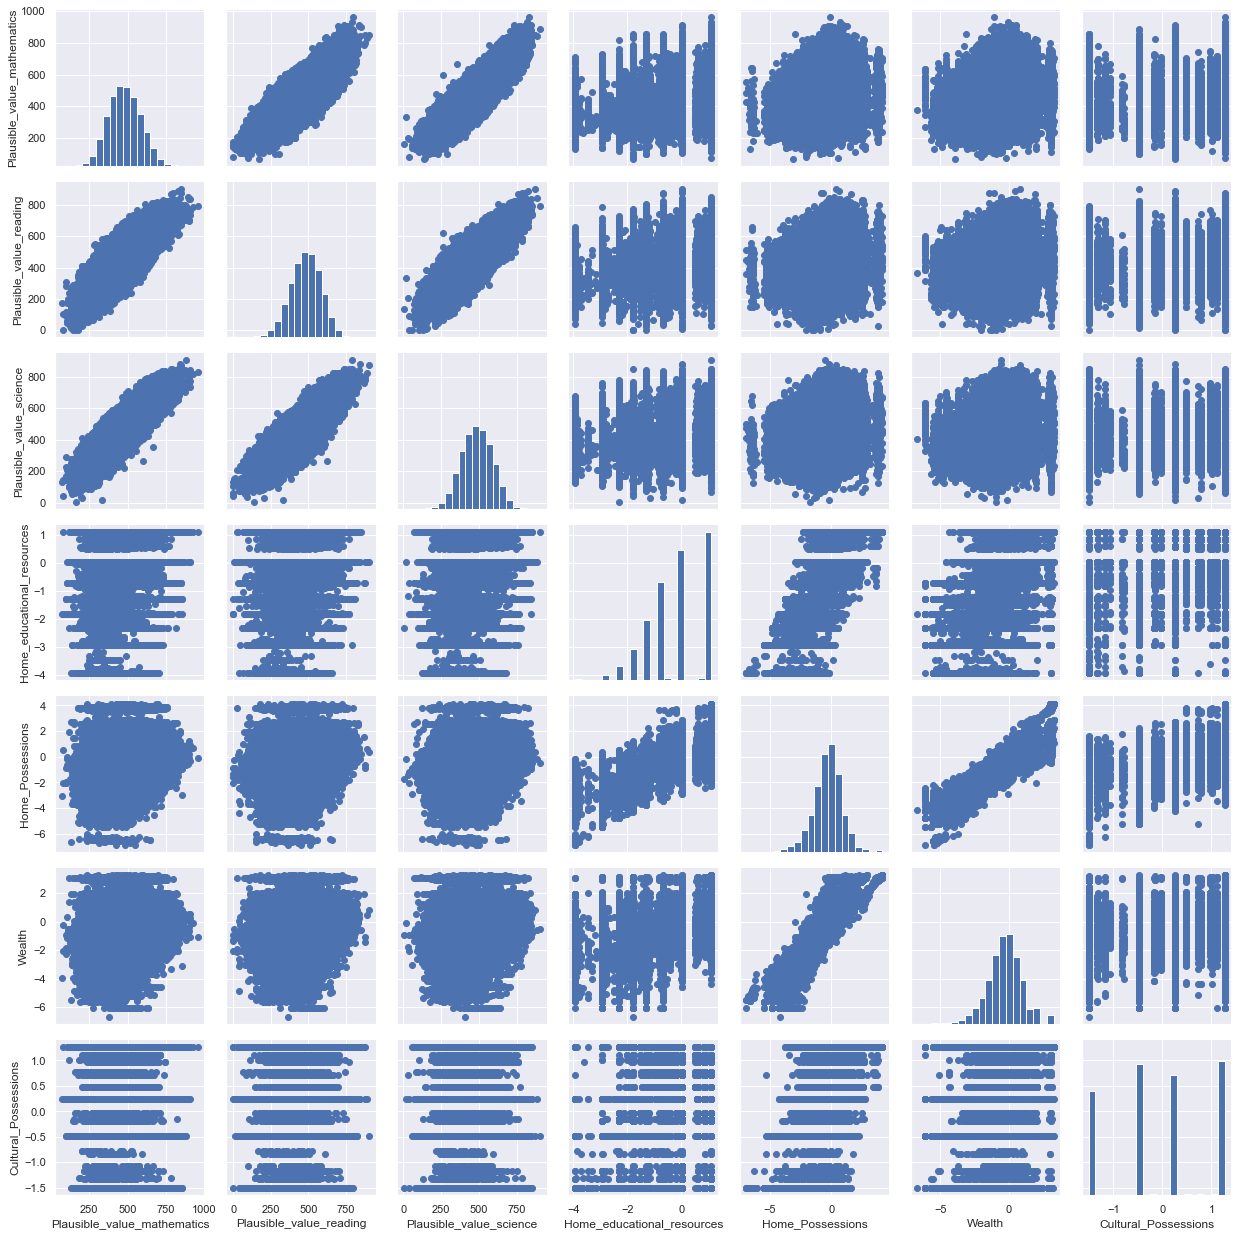

In [67]:
g = sns.PairGrid(data = df, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

*For a quick look into distribution of quantitative variable matrices can be a great way to get lots of information about data. However sometimes those plots needs a bit more research. I decided to plot single scatterplot to get better understanding of those variables*

Text(0, 0.5, 'Wealth')

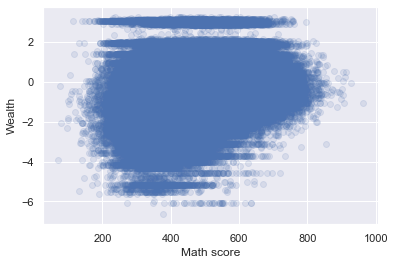

In [68]:
# Scatter plot between scores and whealth and home possesions 
plt.scatter(data = df, x = 'Plausible_value_mathematics', y = 'Wealth', alpha = 1/8);
plt.xlabel('Math score')
plt.ylabel('Wealth')

Text(0, 0.5, 'Science score')

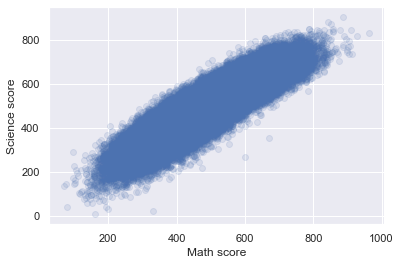

In [69]:
plt.scatter(data = df, x = 'Plausible_value_mathematics', y = 'Plausible_value_science', alpha = 1/8);
plt.xlabel('Math score')
plt.ylabel('Science score')

## Correlation plot

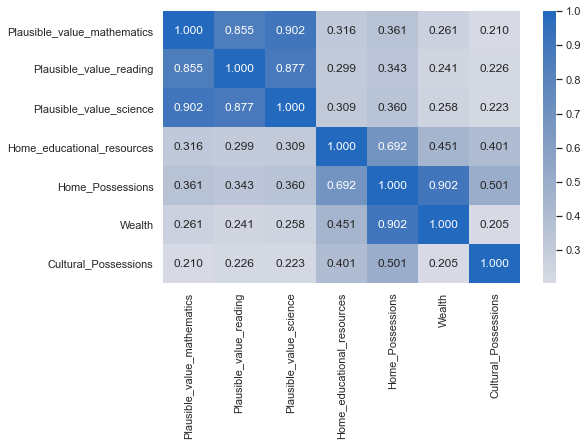

In [70]:
# correlation plot
plt.figure(figsize = [8, 5])
sns.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

## Violin plots for For quantitative vs qualitative variables


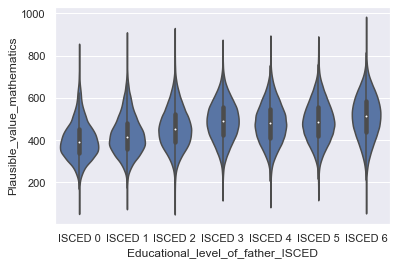

In [71]:
# violin plots
base_color = sns.color_palette()[0]
sns.violinplot(data=df, x='Educational_level_of_father_ISCED', y='Plausible_value_mathematics', color=base_color);

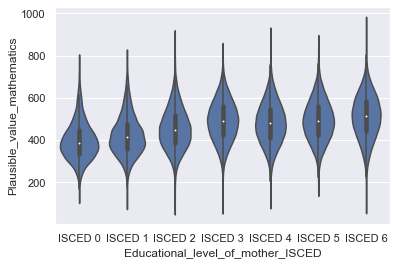

In [72]:
# violin plots
base_color = sns.color_palette()[0]
sns.violinplot(data=df, x='Educational_level_of_mother_ISCED', y='Plausible_value_mathematics', color=base_color);

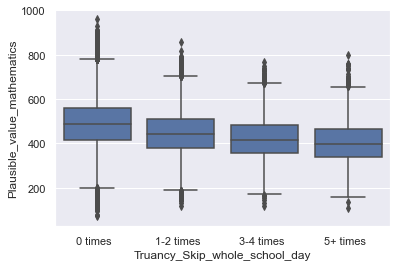

In [73]:
# Box plots
base_color = sns.color_palette()[0]
sns.boxplot(data=df, x='Truancy_Skip_whole_school_day', y='Plausible_value_mathematics', color=base_color);

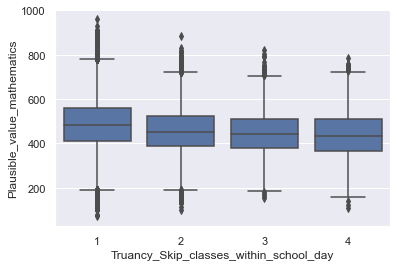

In [74]:
# Box plots
base_color = sns.color_palette()[0]
sns.boxplot(data=df, x='Truancy_Skip_classes_within_school_day', y='Plausible_value_mathematics', color=base_color);

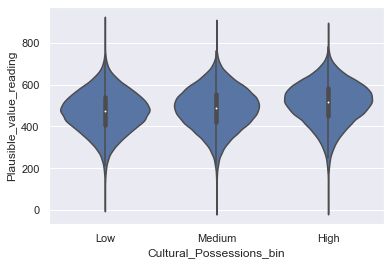

In [75]:
# violin plots
base_color = sns.color_palette()[0]
sns.violinplot(data=df, x='Cultural_Possessions_bin', y='Plausible_value_reading', color=base_color);

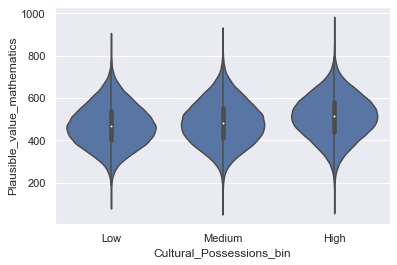

In [76]:
# violin plots
base_color = sns.color_palette()[0]
sns.violinplot(data=df, x='Cultural_Possessions_bin', y='Plausible_value_mathematics', color=base_color);

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

<a id='multivariate'></a>
## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

## Heat maps -  if you do faceting will be multivariate

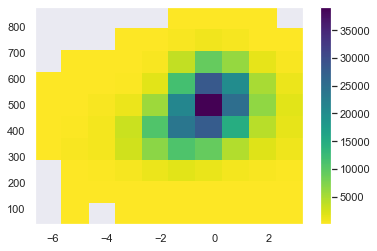

In [106]:
plt.hist2d(data = df, x = 'Wealth', y = 'Overall_score', cmap='viridis_r', cmin=0.5)
plt.colorbar()


In [ ]:
plt.hist2d(data = df, x = 'Plausible_value_reading', y = 'Wealth', cmap='viridis_r', cmin=0.5)
plt.colorbar()

In [107]:
def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
    plt.hist2d(x, y, cmap = palette, cmin = 0.5)


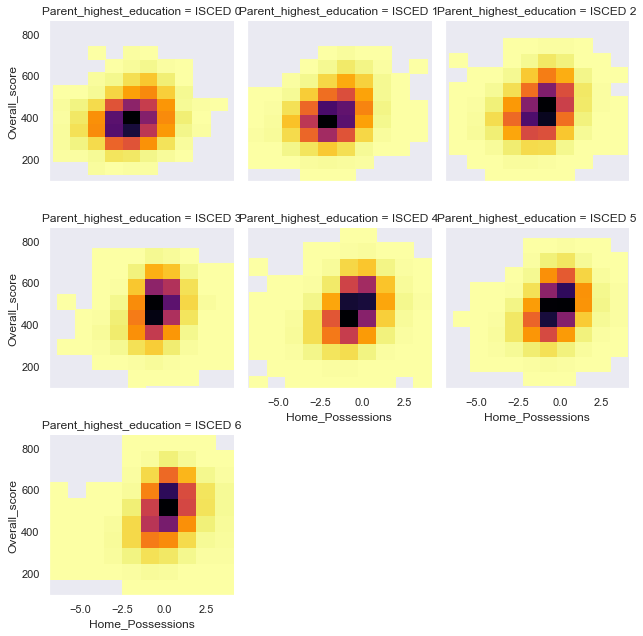

In [109]:
# create faceted heat maps on levels of the cut variable
g = sns.FacetGrid(data = df, col = 'Parent_highest_education', col_wrap = 3, height = 3)
g.map(hist2dgrid, 'Home_Possessions', 'Overall_score', color = 'inferno_r')
g.set_xlabels('Home_Possessions')
g.set_ylabels('Overall_score')

plt.show()

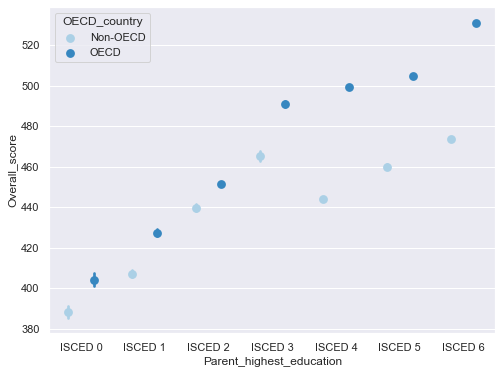

In [85]:
fig = plt.figure(figsize = [8,6])
ax = sns.pointplot(data = df, x = 'Parent_highest_education', y = 'Overall_score', hue = 'OECD_country',
           palette = 'Blues', linestyles = '', dodge = 0.4)
#plt.title('0.3-carat diamond prices across cut and clarity')
#plt.ylabel('Mean Price ($)')
#plt.yscale('log')
#plt.yticks([4e2, 6e2, 1e3], ['400', '600', '1000'])
ax.set_yticklabels([],minor = True)
plt.show();

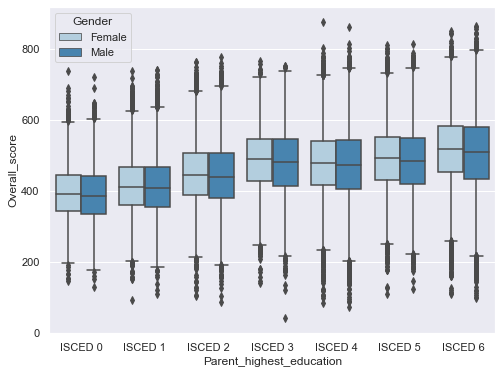

In [113]:
fig = plt.figure(figsize = [8,6])
ax = sns.boxplot(data = df, x = 'Parent_highest_education', y = 'Overall_score', hue = 'Gender',
           palette = 'Blues', dodge = 0.4)
ax.set_yticklabels([],minor = True)
plt.show();

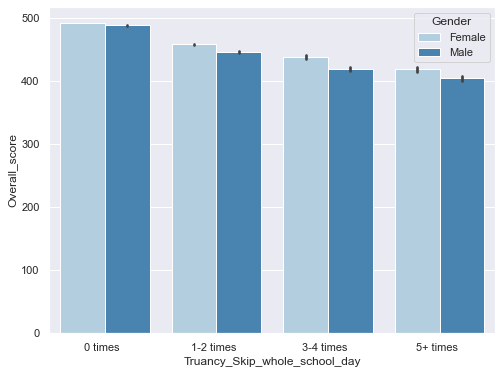

In [121]:
fig = plt.figure(figsize = [8,6])
ax = sns.barplot(data = df, x = 'Truancy_Skip_whole_school_day', y = 'Overall_score', hue = 'Gender',
           palette = 'Blues', dodge = 0.4)
ax.set_yticklabels([],minor = True)
plt.show();

OECD_country
Plausible_value_mathematics
Cultural_Possessions_bin

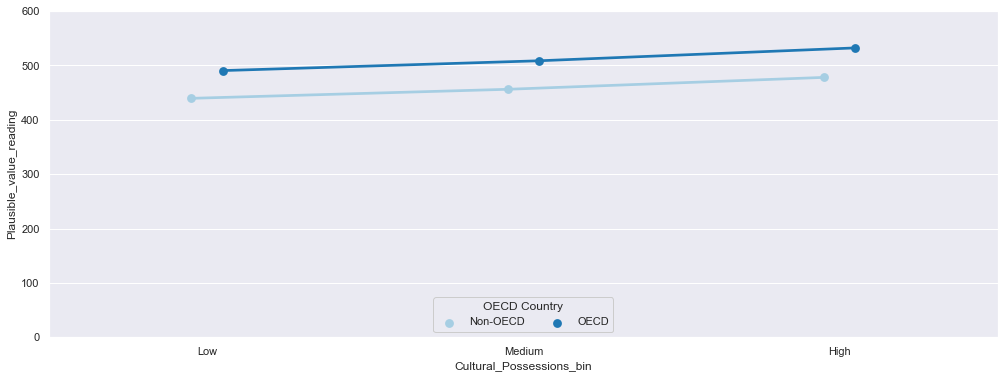

In [79]:
plt.figure(figsize = [17, 6])

#ax = sb.barplot(data = pisa_clean[pisa_clean['Study Time With Parent'] > 5], x = 'Study Time With Parent', y = 'Overall Score', hue = 'Parents Presence')
ax = sns.pointplot(data = df, 
                  x = 'Cultural_Possessions_bin', y = 'Plausible_value_reading', hue = 'OECD_country',
                  dodge = 0.1, palette = sns.color_palette('Paired')
                 )
ax.set_ylim(ymin=0)
ax.set_ylim(ymax=600)
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'OECD Country');

***Show both charts with scales starting form 0 and 400!!***

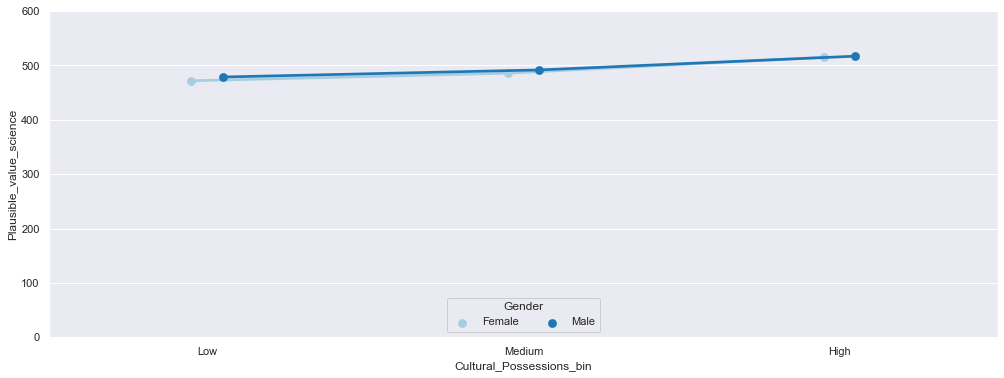

In [80]:
plt.figure(figsize = [17, 6])
ax = sns.pointplot(data = df, 
                  x = 'Cultural_Possessions_bin', y = 'Plausible_value_science', hue = 'Gender',
                  dodge = 0.1, palette = sns.color_palette('Paired')
                 )
ax.set_ylim(ymin=0)
ax.set_ylim(ymax=600)
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Gender');

## Heat map =  three variable
= overall score, 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

<a id='conclusion'></a>
## Conclusion